In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = 'ucberkeley_measuring_hate_speech_dataset_preprocessed.csv'
df = pd.read_csv(file_path)

In [3]:
t_race_columns = [col for col in df.columns if col.startswith('target_race_')]
t_religion_columns = [col for col in df.columns if col.startswith('target_religion_')]
t_gender_columns = [col for col in df.columns if col.startswith('target_gender_')]
t_sexuality_columns = [col for col in df.columns if col.startswith('target_sexuality_')]

In [4]:
def calculate_aadr(categories_dict):
    results = {}
    for category, hatespeech_scores in categories_dict.items():
        disagreement_rate = 1 - (hatespeech_scores.count(max(set(hatespeech_scores), key=hatespeech_scores.count)) / len(hatespeech_scores))
        results[category] = disagreement_rate
    return results

In [5]:
# Function to calculate AADR for each category within the annotator's demographic group
def calculate_aadr_for_group(df, category_columns, demographic_column):
    aadr_results = {}
    for demographic in df[demographic_column].unique():
        demographic_group = df[df[demographic_column] == demographic]
        for category in category_columns:
            # Only consider the rows where the category is True
            category_scores = demographic_group[demographic_group[category] == True]['hatespeech'].tolist()
            if category_scores:  # Check if the list is not empty
                aadr = calculate_aadr({category: category_scores}).get(category)
                # Store the result with the demographic and category as a tuple key
                aadr_results[(demographic, category.replace('target_race_', '').replace('target_religion_', '').replace('target_gender_', '').replace('target_sexuality_', ''))] = aadr
    return aadr_results

### Target vs Annotator Gender

In [6]:
# Calculate AADR for Target Race within each annotator gender
t_race_a_gender_aadr_results = calculate_aadr_for_group(df, t_race_columns, 'annotator_gender')

# Calculate AADR for Target Religion within each annotator gender
t_religion_a_gender_aadr_results = calculate_aadr_for_group(df, t_religion_columns, 'annotator_gender')

# Calculate AADR for Target Gender within each annotator gender
t_gender_a_gender_aadr_results = calculate_aadr_for_group(df, t_gender_columns, 'annotator_gender')

# Calculate AADR for Target Sexuality within each annotator gender
t_sexuality_a_gender_aadr_results = calculate_aadr_for_group(df, t_sexuality_columns, 'annotator_gender')

In [7]:
# Unpack the tuple keys and their corresponding AADR value into a DataFrame
t_race_a_gender_aadr_data = [{'Annotator Gender': a_gender, 'Target Race': t_race, 'AADR': aadr}
                  for (a_gender, t_race), aadr in t_race_a_gender_aadr_results.items()]
t_race_a_gender_aadr_df = pd.DataFrame(t_race_a_gender_aadr_data)

# Corrected pivot call
t_race_a_gender_aadr_pivot = t_race_a_gender_aadr_df.pivot(index='Target Race', columns='Annotator Gender', values='AADR')

In [8]:
# Unpack the tuple keys and their corresponding AADR value into a DataFrame
t_religion_a_gender_aadr_data = [{'Annotator Gender': a_gender, 'Target Religion': t_religion, 'AADR': aadr}
                  for (a_gender, t_religion), aadr in t_religion_a_gender_aadr_results.items()]
t_religion_a_gender_aadr_df = pd.DataFrame(t_religion_a_gender_aadr_data)

# Corrected pivot call
t_religion_a_gender_aadr_pivot = t_religion_a_gender_aadr_df.pivot(index='Target Religion', columns='Annotator Gender', values='AADR')

In [9]:
# Unpack the tuple keys and their corresponding AADR value into a DataFrame
t_gender_a_gender_aadr_data = [{'Annotator Gender': a_gender, 'Target Gender': t_gender, 'AADR': aadr}
                  for (a_gender, t_gender), aadr in t_gender_a_gender_aadr_results.items()]
t_gender_a_gender_aadr_df = pd.DataFrame(t_gender_a_gender_aadr_data)

# Corrected pivot call
t_gender_a_gender_aadr_pivot = t_gender_a_gender_aadr_df.pivot(index='Target Gender', columns='Annotator Gender', values='AADR')

In [10]:
# Unpack the tuple keys and their corresponding AADR value into a DataFrame
t_sexuality_a_gender_aadr_data = [{'Annotator Gender': a_gender, 'Target Sexuality': t_sexuality, 'AADR': aadr}
                  for (a_gender, t_sexuality), aadr in t_sexuality_a_gender_aadr_results.items()]
t_sexuality_a_gender_aadr_df = pd.DataFrame(t_sexuality_a_gender_aadr_data)

# Corrected pivot call
t_sexuality_a_gender_aadr_pivot = t_sexuality_a_gender_aadr_df.pivot(index='Target Sexuality', columns='Annotator Gender', values='AADR')

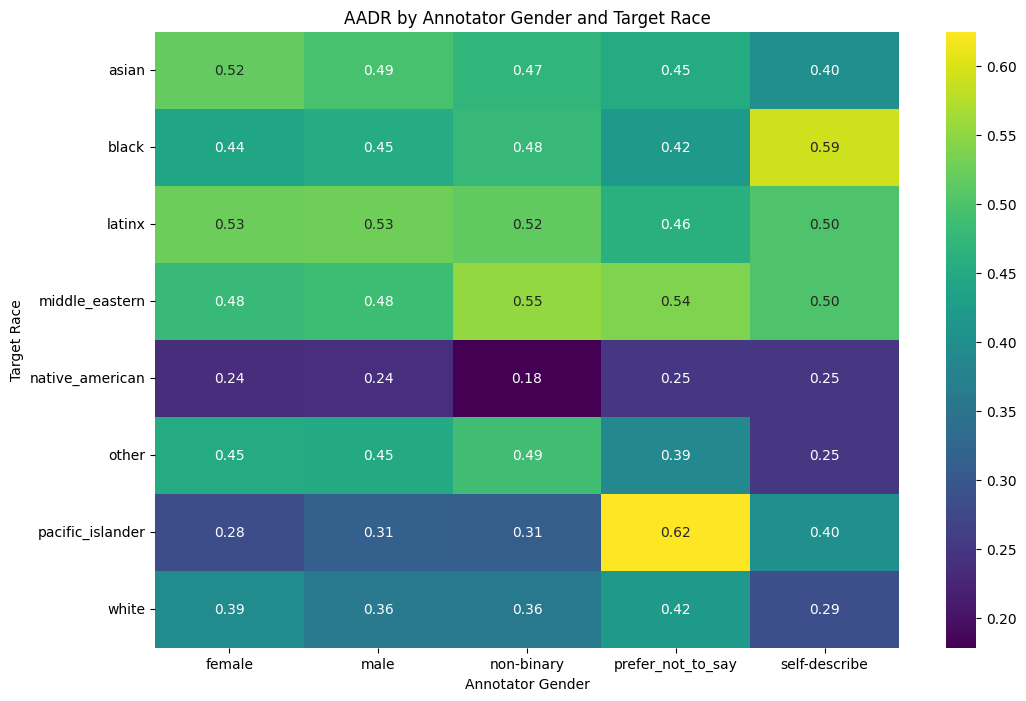

In [11]:
# Plot the heatmap for AADR by annotator gender and target race
plt.figure(figsize=(12, 8))
sns.heatmap(t_race_a_gender_aadr_pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title('AADR by Annotator Gender and Target Race')
plt.xlabel('Annotator Gender')
plt.ylabel('Target Race')
plt.show()

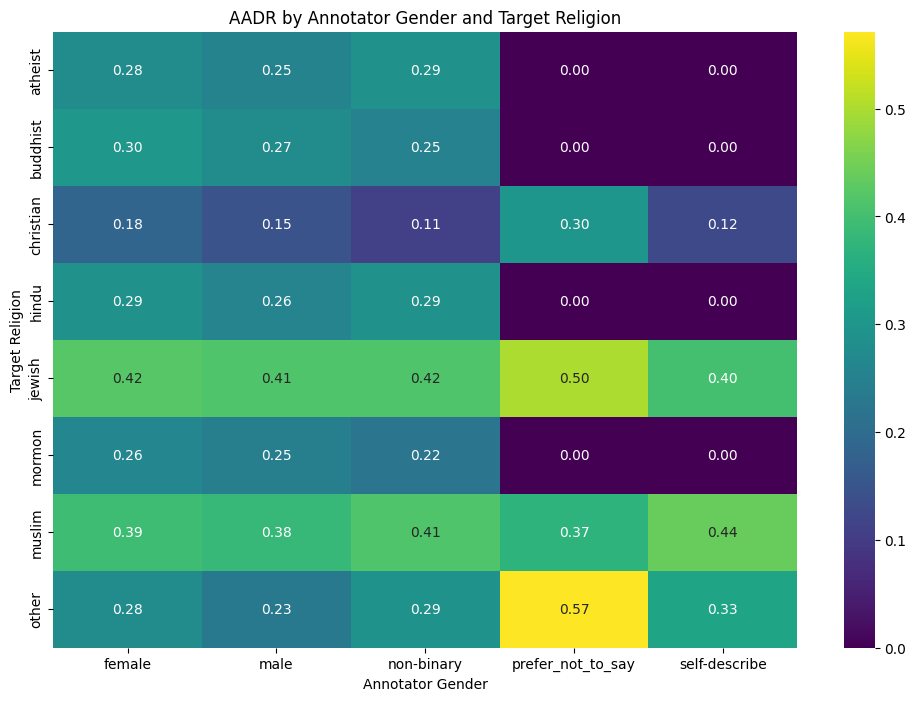

In [12]:
# Plot the heatmap for AADR by annotator gender and target religion
plt.figure(figsize=(12, 8))
sns.heatmap(t_religion_a_gender_aadr_pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title('AADR by Annotator Gender and Target Religion')
plt.xlabel('Annotator Gender')
plt.ylabel('Target Religion')
plt.show()

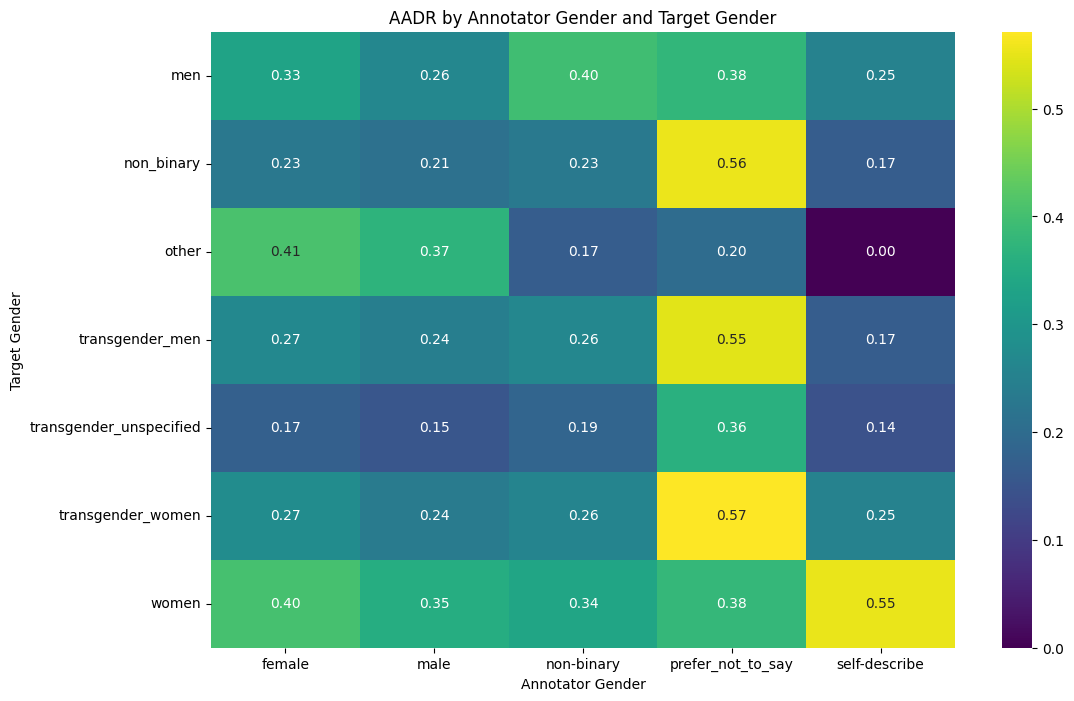

In [13]:
# Plot the heatmap for AADR by annotator gender and target gender
plt.figure(figsize=(12, 8))
sns.heatmap(t_gender_a_gender_aadr_pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title('AADR by Annotator Gender and Target Gender')
plt.xlabel('Annotator Gender')
plt.ylabel('Target Gender')
plt.show()

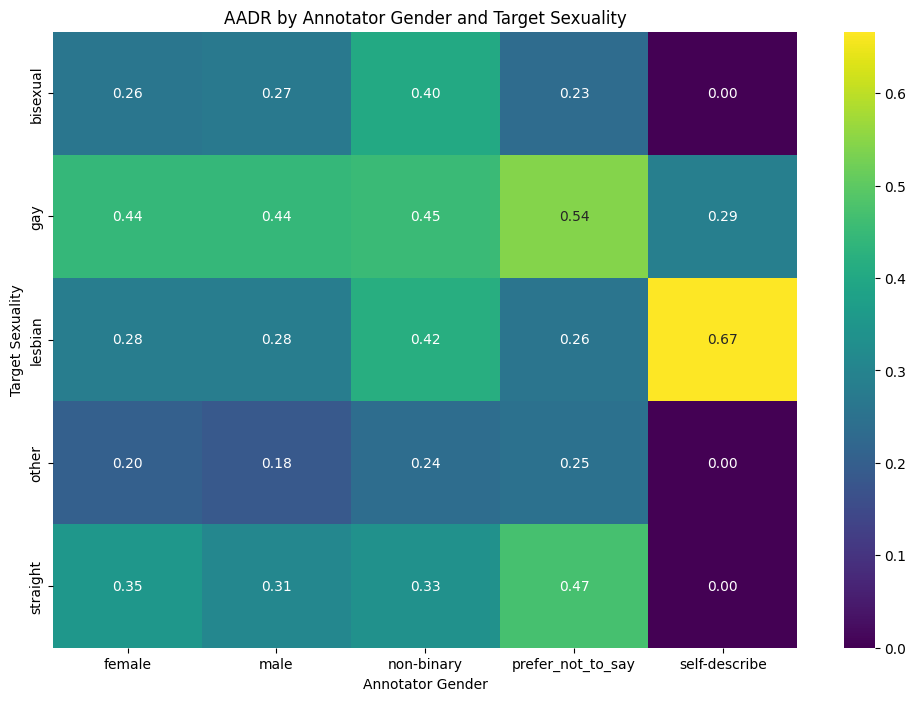

In [14]:
# Plot the heatmap for AADR by annotator gender and target sexuality
plt.figure(figsize=(12, 8))
sns.heatmap(t_sexuality_a_gender_aadr_pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title('AADR by Annotator Gender and Target Sexuality')
plt.xlabel('Annotator Gender')
plt.ylabel('Target Sexuality')
plt.show()

### Target vs Annotator Race

In [15]:
# Calculate AADR for Target Race within each annotator race
t_race_a_race_aadr_results = calculate_aadr_for_group(df, t_race_columns, 'annotator_race')

# Calculate AADR for Target Religion within each annotator race
t_religion_a_race_aadr_results = calculate_aadr_for_group(df, t_religion_columns, 'annotator_race')

# Calculate AADR for Target Gender within each annotator race
t_gender_a_race_aadr_results = calculate_aadr_for_group(df, t_gender_columns, 'annotator_race')

# Calculate AADR for Target Sexuality within each annotator race
t_sexuality_a_race_aadr_results = calculate_aadr_for_group(df, t_sexuality_columns, 'annotator_race')

In [16]:
# Unpack the tuple keys and their corresponding AADR value into a DataFrame
t_race_a_race_aadr_data = [{'Annotator Race': a_race, 'Target Race': t_race, 'AADR': aadr}
                  for (a_race, t_race), aadr in t_race_a_race_aadr_results.items()]
t_race_a_race_aadr_df = pd.DataFrame(t_race_a_race_aadr_data)

# Corrected pivot call
t_race_a_race_aadr_pivot = t_race_a_race_aadr_df.pivot(index='Target Race', columns='Annotator Race', values='AADR')

In [17]:
# Unpack the tuple keys and their corresponding AADR value into a DataFrame
t_religion_a_race_aadr_data = [{'Annotator Race': a_race, 'Target Religion': t_religion, 'AADR': aadr}
                  for (a_race, t_religion), aadr in t_religion_a_race_aadr_results.items()]
t_religion_a_race_aadr_df = pd.DataFrame(t_religion_a_race_aadr_data)

# Corrected pivot call
t_religion_a_race_aadr_pivot = t_religion_a_race_aadr_df.pivot(index='Target Religion', columns='Annotator Race', values='AADR')

In [18]:
# Unpack the tuple keys and their corresponding AADR value into a DataFrame
t_gender_a_race_aadr_data = [{'Annotator Race': a_race, 'Target Gender': t_gender, 'AADR': aadr}
                  for (a_race, t_gender), aadr in t_gender_a_race_aadr_results.items()]
t_gender_a_race_aadr_df = pd.DataFrame(t_gender_a_race_aadr_data)

# Corrected pivot call
t_gender_a_race_aadr_pivot = t_gender_a_race_aadr_df.pivot(index='Target Gender', columns='Annotator Race', values='AADR')

In [19]:
# Unpack the tuple keys and their corresponding AADR value into a DataFrame
t_sexuality_a_race_aadr_data = [{'Annotator Race': a_gender, 'Target Sexuality': t_sexuality, 'AADR': aadr}
                  for (a_gender, t_sexuality), aadr in t_sexuality_a_race_aadr_results.items()]
t_sexuality_a_race_aadr_df = pd.DataFrame(t_sexuality_a_race_aadr_data)

# Corrected pivot call
t_sexuality_a_race_aadr_pivot = t_sexuality_a_race_aadr_df.pivot(index='Target Sexuality', columns='Annotator Race', values='AADR')

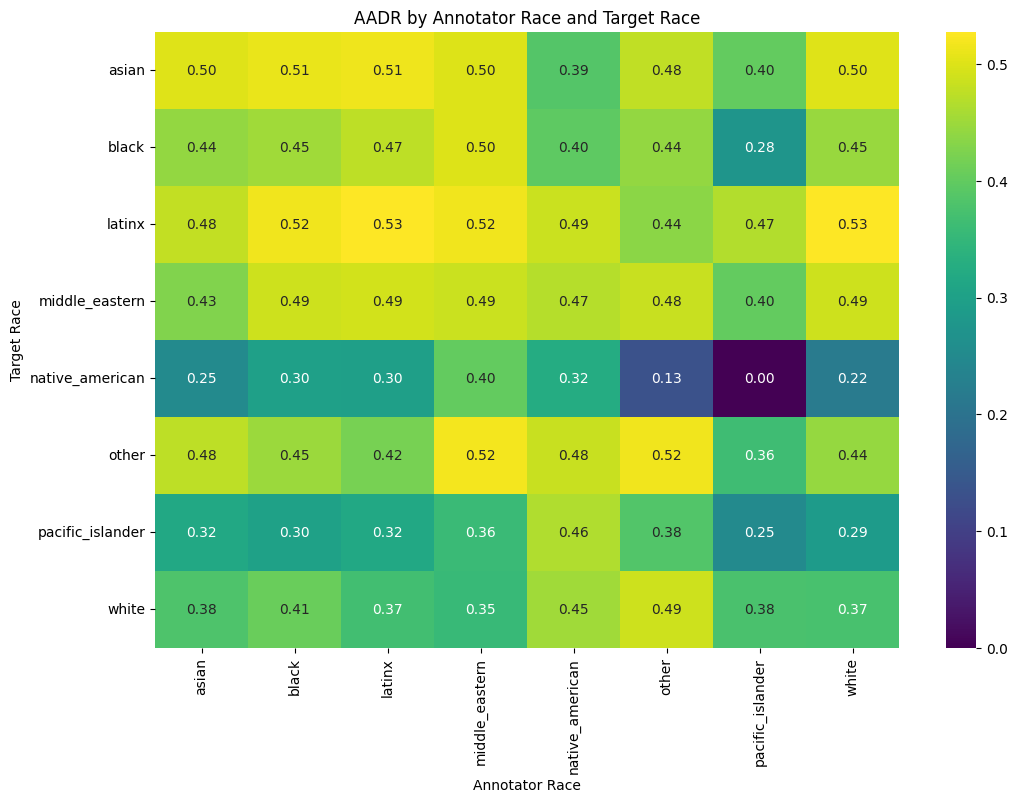

In [20]:
# Plot the heatmap for AADR by annotator race and target race
plt.figure(figsize=(12, 8))
sns.heatmap(t_race_a_race_aadr_pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title('AADR by Annotator Race and Target Race')
plt.xlabel('Annotator Race')
plt.ylabel('Target Race')
plt.show()

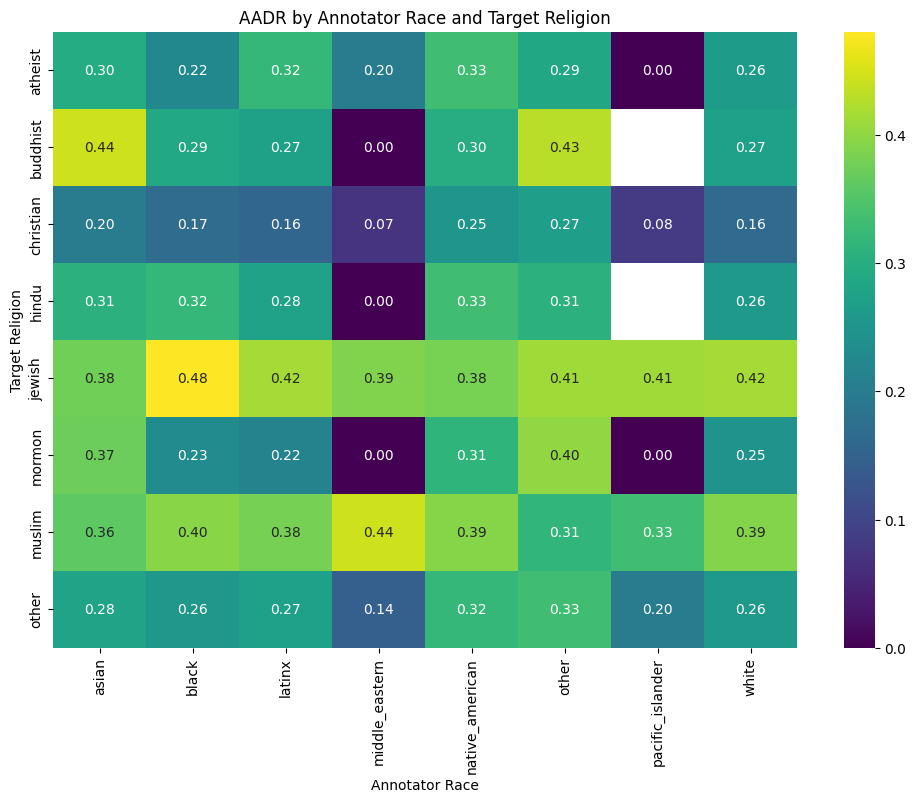

In [21]:
# Plot the heatmap for AADR by annotator race and target religion
plt.figure(figsize=(12, 8))
sns.heatmap(t_religion_a_race_aadr_pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title('AADR by Annotator Race and Target Religion')
plt.xlabel('Annotator Race')
plt.ylabel('Target Religion')
plt.show()

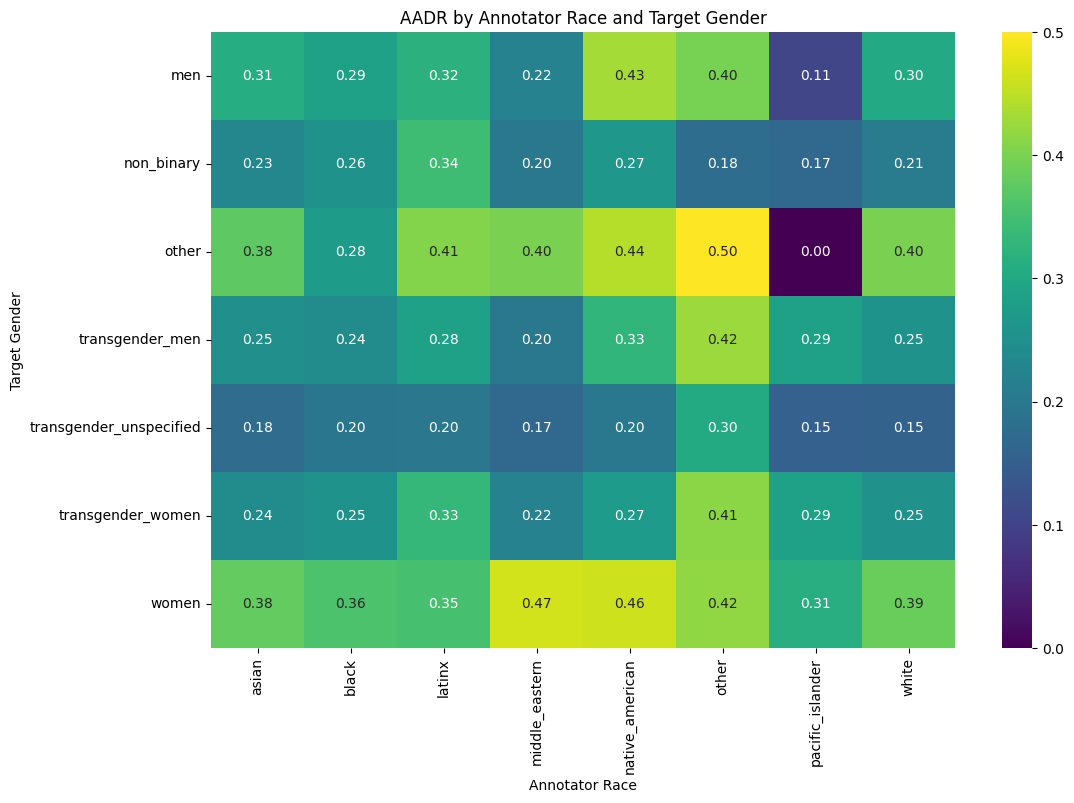

In [22]:
# Plot the heatmap for AADR by annotator race and target gender
plt.figure(figsize=(12, 8))
sns.heatmap(t_gender_a_race_aadr_pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title('AADR by Annotator Race and Target Gender')
plt.xlabel('Annotator Race')
plt.ylabel('Target Gender')
plt.show()

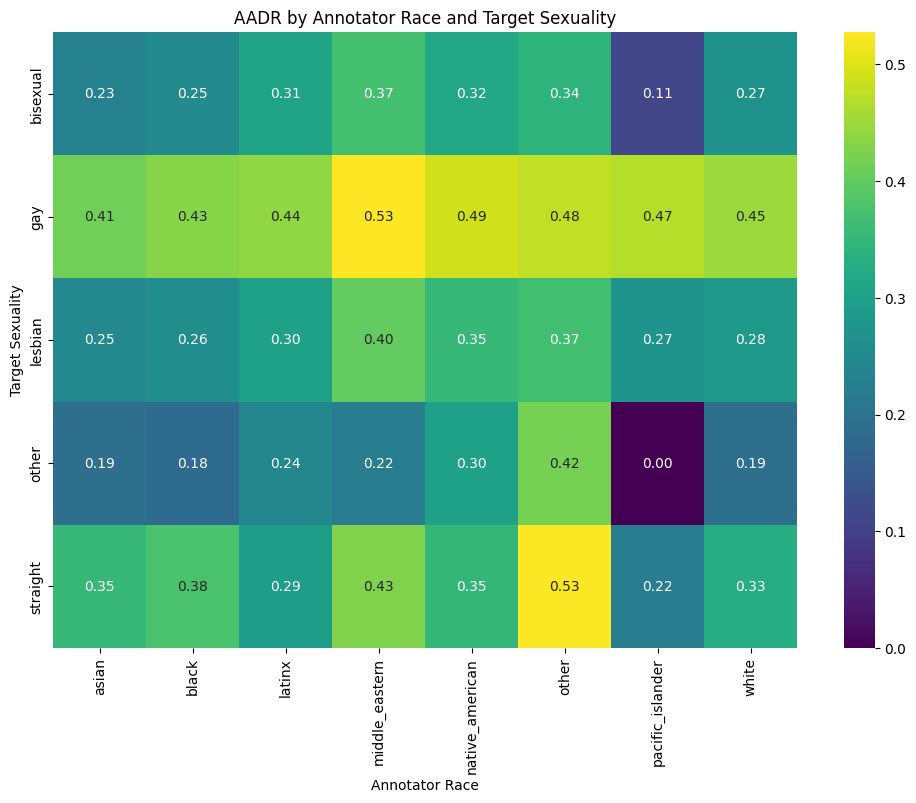

In [23]:
# Plot the heatmap for AADR by annotator race and target sexuality
plt.figure(figsize=(12, 8))
sns.heatmap(t_sexuality_a_race_aadr_pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title('AADR by Annotator Race and Target Sexuality')
plt.xlabel('Annotator Race')
plt.ylabel('Target Sexuality')
plt.show()

### Target vs Annotator Religion

In [24]:
# Calculate AADR for Target Race within each annotator religion
t_race_a_religion_aadr_results = calculate_aadr_for_group(df, t_race_columns, 'annotator_religion')

# Calculate AADR for Target Religion within each annotator religion
t_religion_a_religion_aadr_results = calculate_aadr_for_group(df, t_religion_columns, 'annotator_religion')

# Calculate AADR for Target Gender within each annotator religion
t_gender_a_religion_aadr_results = calculate_aadr_for_group(df, t_gender_columns, 'annotator_religion')

# Calculate AADR for Target Sexuality within each annotator religion
t_sexuality_a_religion_aadr_results = calculate_aadr_for_group(df, t_sexuality_columns, 'annotator_religion')

In [25]:
# Unpack the tuple keys and their corresponding AADR value into a DataFrame
t_race_a_religion_aadr_data = [{'Annotator Religion': a_religion, 'Target Race': t_race, 'AADR': aadr}
                  for (a_religion, t_race), aadr in t_race_a_religion_aadr_results.items()]
t_race_a_religion_aadr_df = pd.DataFrame(t_race_a_religion_aadr_data)

# Corrected pivot call
t_race_a_religion_aadr_pivot = t_race_a_religion_aadr_df.pivot(index='Target Race', columns='Annotator Religion', values='AADR')

In [26]:
# Unpack the tuple keys and their corresponding AADR value into a DataFrame
t_religion_a_religion_aadr_data = [{'Annotator Religion': a_religion, 'Target Religion': t_religion, 'AADR': aadr}
                  for (a_religion, t_religion), aadr in t_religion_a_religion_aadr_results.items()]
t_religion_a_religion_aadr_df = pd.DataFrame(t_religion_a_religion_aadr_data)

# Corrected pivot call
t_religion_a_religion_aadr_pivot = t_religion_a_religion_aadr_df.pivot(index='Target Religion', columns='Annotator Religion', values='AADR')

In [27]:
# Unpack the tuple keys and their corresponding AADR value into a DataFrame
t_gender_a_religion_aadr_data = [{'Annotator Religion': a_religion, 'Target Gender': t_gender, 'AADR': aadr}
                  for (a_religion, t_gender), aadr in t_gender_a_religion_aadr_results.items()]
t_gender_a_religion_aadr_df = pd.DataFrame(t_gender_a_religion_aadr_data)

# Corrected pivot call
t_gender_a_religion_aadr_pivot = t_gender_a_religion_aadr_df.pivot(index='Target Gender', columns='Annotator Religion', values='AADR')

In [28]:
# Unpack the tuple keys and their corresponding AADR value into a DataFrame
t_sexuality_a_religion_aadr_data = [{'Annotator Religion': a_religion, 'Target Sexuality': t_sexuality, 'AADR': aadr}
                  for (a_religion, t_sexuality), aadr in t_sexuality_a_religion_aadr_results.items()]
t_sexuality_a_religion_aadr_df = pd.DataFrame(t_sexuality_a_religion_aadr_data)

# Corrected pivot call
t_sexuality_a_religion_aadr_pivot = t_sexuality_a_religion_aadr_df.pivot(index='Target Sexuality', columns='Annotator Religion', values='AADR')

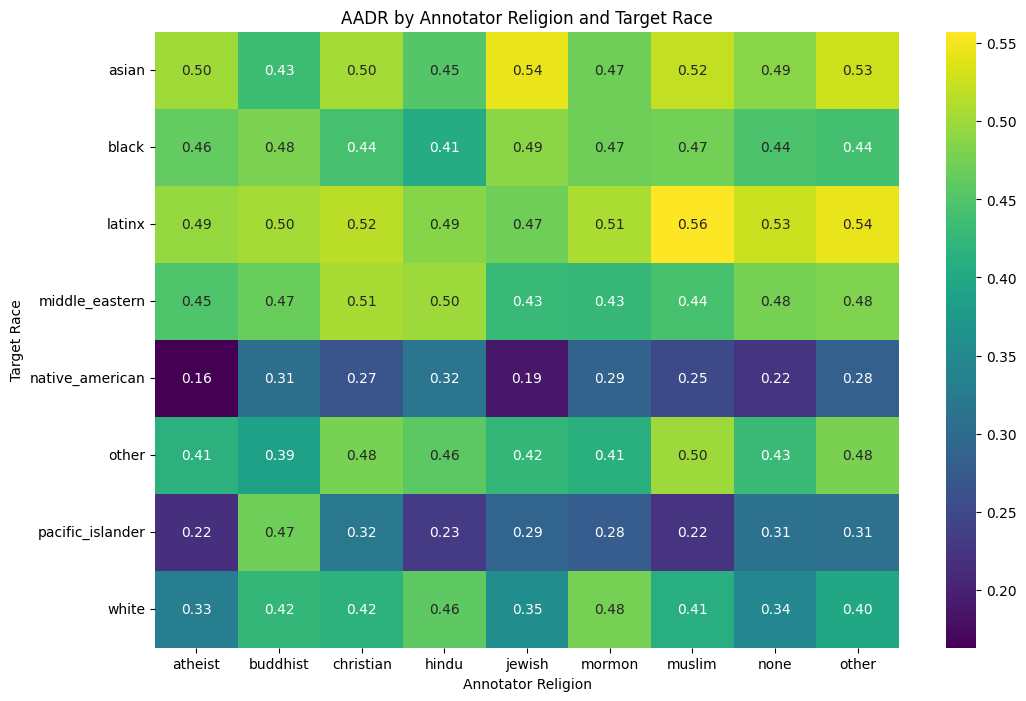

In [29]:
# Plot the heatmap for AADR by annotator religion and target race
plt.figure(figsize=(12, 8))
sns.heatmap(t_race_a_religion_aadr_pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title('AADR by Annotator Religion and Target Race')
plt.xlabel('Annotator Religion')
plt.ylabel('Target Race')
plt.show()

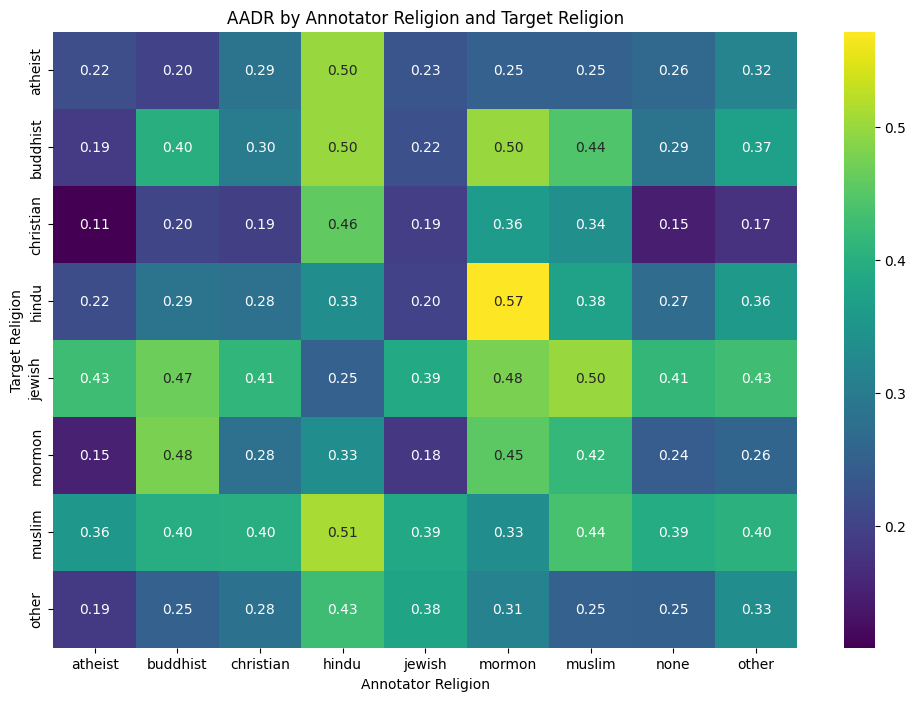

In [30]:
# Plot the heatmap for AADR by annotator religion and target religion
plt.figure(figsize=(12, 8))
sns.heatmap(t_religion_a_religion_aadr_pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title('AADR by Annotator Religion and Target Religion')
plt.xlabel('Annotator Religion')
plt.ylabel('Target Religion')
plt.show()

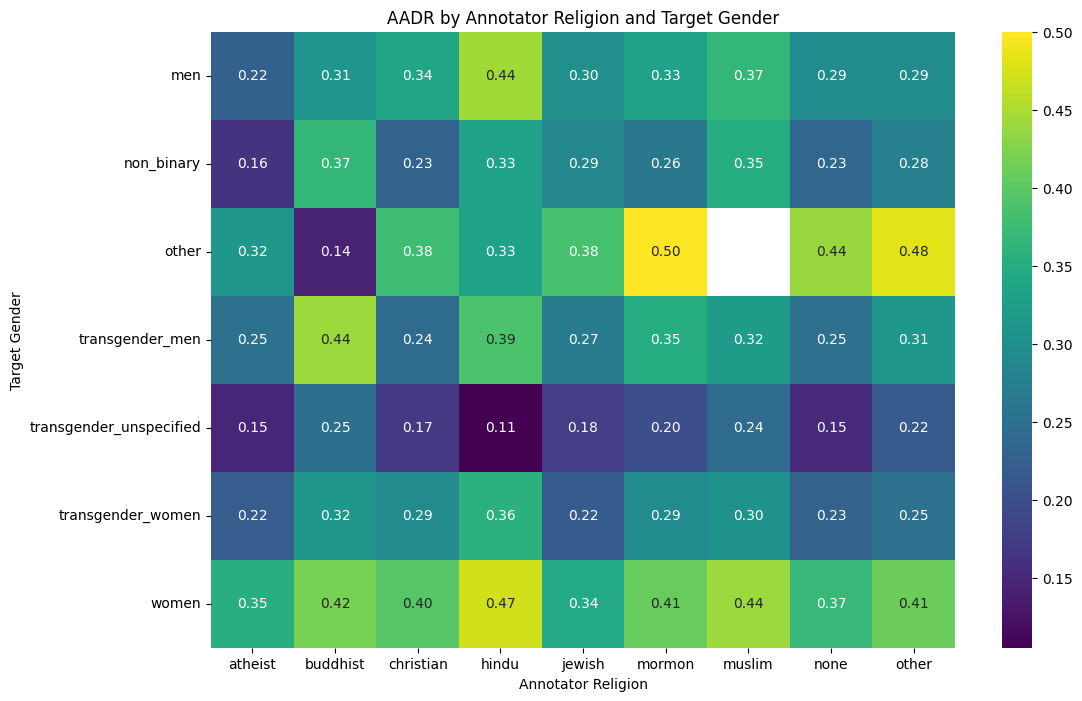

In [31]:
# Plot the heatmap for AADR by annotator religion and target gender
plt.figure(figsize=(12, 8))
sns.heatmap(t_gender_a_religion_aadr_pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title('AADR by Annotator Religion and Target Gender')
plt.xlabel('Annotator Religion')
plt.ylabel('Target Gender')
plt.show()

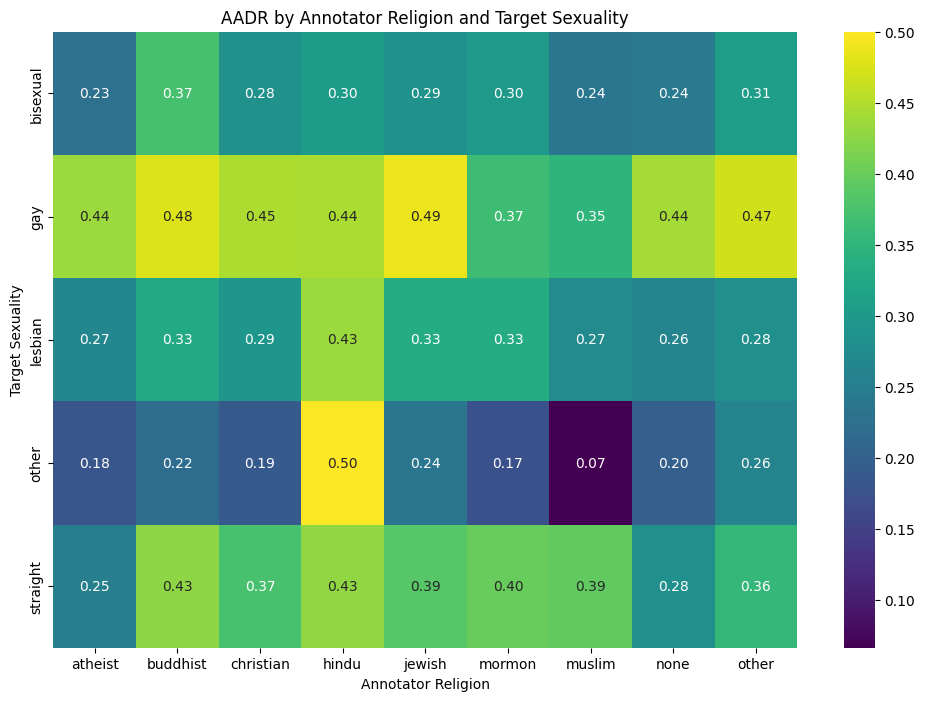

In [32]:
# Plot the heatmap for AADR by annotator religion and target sexuality
plt.figure(figsize=(12, 8))
sns.heatmap(t_sexuality_a_religion_aadr_pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title('AADR by Annotator Religion and Target Sexuality')
plt.xlabel('Annotator Religion')
plt.ylabel('Target Sexuality')
plt.show()

### Target vs Annotator Sexuality

In [33]:
# Calculate AADR for Target Race within each annotator sexuality
t_race_a_sexuality_aadr_results = calculate_aadr_for_group(df, t_race_columns, 'annotator_sexuality')

# Calculate AADR for Target Religion within each annotator sexuality
t_religion_a_sexuality_aadr_results = calculate_aadr_for_group(df, t_religion_columns, 'annotator_sexuality')

# Calculate AADR for Target Gender within each annotator sexuality
t_gender_a_sexuality_aadr_results = calculate_aadr_for_group(df, t_gender_columns, 'annotator_sexuality')

# Calculate AADR for Target Sexuality within each annotator sexuality
t_sexuality_a_sexuality_aadr_results = calculate_aadr_for_group(df, t_sexuality_columns, 'annotator_sexuality')

In [34]:
# Unpack the tuple keys and their corresponding AADR value into a DataFrame
t_race_a_sexuality_aadr_data = [{'Annotator Sexuality': a_sexuality, 'Target Race': t_race, 'AADR': aadr}
                  for (a_sexuality, t_race), aadr in t_race_a_sexuality_aadr_results.items()]
t_race_a_sexuality_aadr_df = pd.DataFrame(t_race_a_sexuality_aadr_data)

# Corrected pivot call
t_race_a_sexuality_aadr_pivot = t_race_a_sexuality_aadr_df.pivot(index='Target Race', columns='Annotator Sexuality', values='AADR')

In [35]:
# Unpack the tuple keys and their corresponding AADR value into a DataFrame
t_religion_a_sexuality_aadr_data = [{'Annotator Sexuality': a_sexuality, 'Target Religion': t_religion, 'AADR': aadr}
                  for (a_sexuality, t_religion), aadr in t_religion_a_sexuality_aadr_results.items()]
t_religion_a_sexuality_aadr_df = pd.DataFrame(t_religion_a_sexuality_aadr_data)

# Corrected pivot call
t_religion_a_sexuality_aadr_pivot = t_religion_a_sexuality_aadr_df.pivot(index='Target Religion', columns='Annotator Sexuality', values='AADR')

In [36]:
# Unpack the tuple keys and their corresponding AADR value into a DataFrame
t_gender_a_sexuality_aadr_data = [{'Annotator Sexuality': a_sexuality, 'Target Gender': t_gender, 'AADR': aadr}
                  for (a_sexuality, t_gender), aadr in t_gender_a_sexuality_aadr_results.items()]
t_gender_a_sexuality_aadr_df = pd.DataFrame(t_gender_a_sexuality_aadr_data)

# Corrected pivot call
t_gender_a_sexuality_aadr_pivot = t_gender_a_sexuality_aadr_df.pivot(index='Target Gender', columns='Annotator Sexuality', values='AADR')

In [37]:
# Unpack the tuple keys and their corresponding AADR value into a DataFrame
t_sexuality_a_sexuality_aadr_data = [{'Annotator Sexuality': a_sexuality, 'Target Sexuality': t_sexuality, 'AADR': aadr}
                  for (a_sexuality, t_sexuality), aadr in t_sexuality_a_sexuality_aadr_results.items()]
t_sexuality_a_sexuality_aadr_df = pd.DataFrame(t_sexuality_a_sexuality_aadr_data)

# Corrected pivot call
t_sexuality_a_sexuality_aadr_pivot = t_sexuality_a_sexuality_aadr_df.pivot(index='Target Sexuality', columns='Annotator Sexuality', values='AADR')

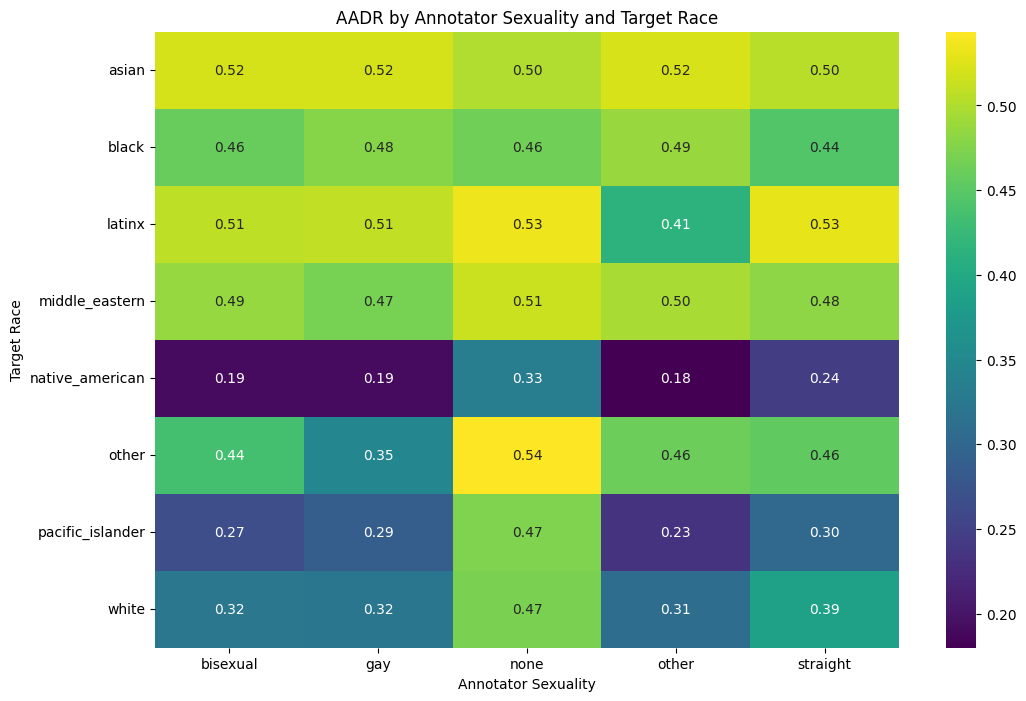

In [38]:
# Plot the heatmap for AADR by annotator sexuality and target race
plt.figure(figsize=(12, 8))
sns.heatmap(t_race_a_sexuality_aadr_pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title('AADR by Annotator Sexuality and Target Race')
plt.xlabel('Annotator Sexuality')
plt.ylabel('Target Race')
plt.show()

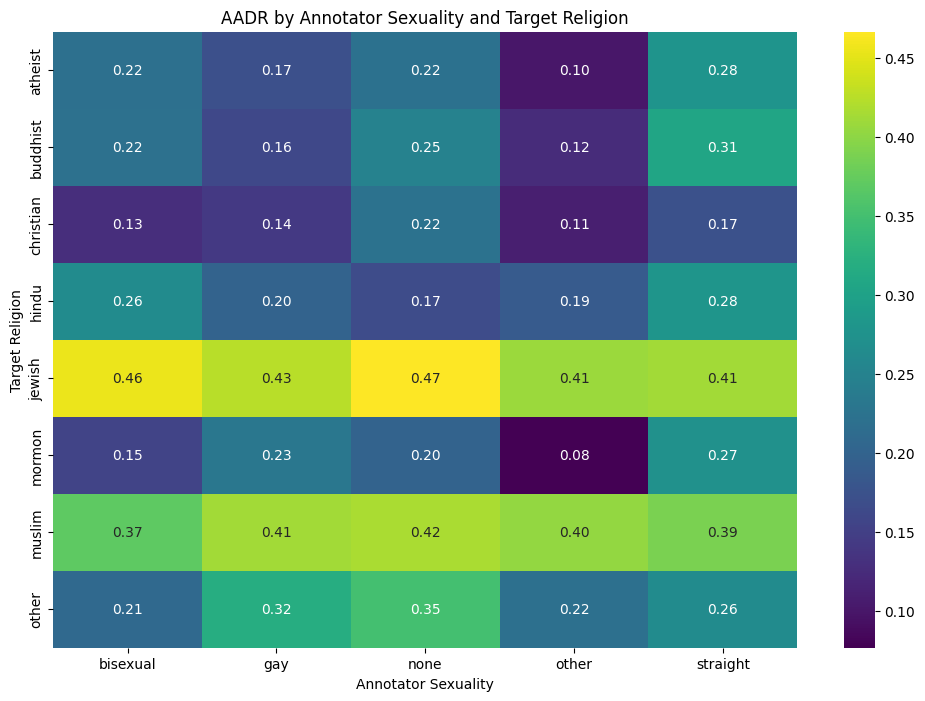

In [39]:
# Plot the heatmap for AADR by annotator sexuality and target religion
plt.figure(figsize=(12, 8))
sns.heatmap(t_religion_a_sexuality_aadr_pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title('AADR by Annotator Sexuality and Target Religion')
plt.xlabel('Annotator Sexuality')
plt.ylabel('Target Religion')
plt.show()

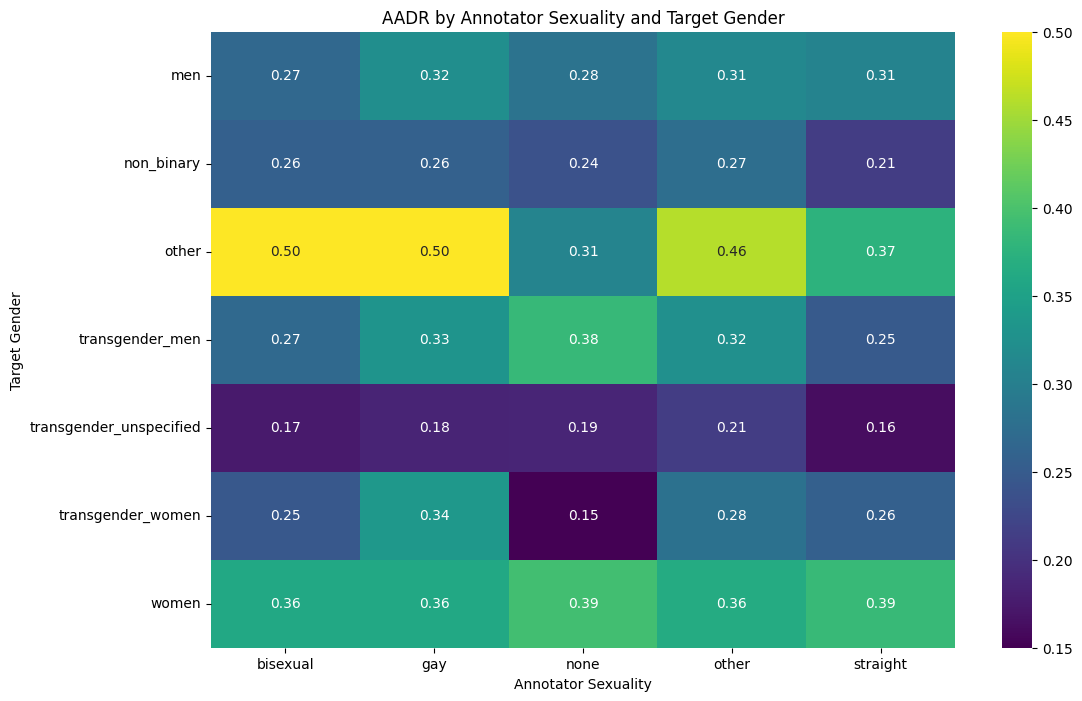

In [40]:
# Plot the heatmap for AADR by annotator sexuality and target gender
plt.figure(figsize=(12, 8))
sns.heatmap(t_gender_a_sexuality_aadr_pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title('AADR by Annotator Sexuality and Target Gender')
plt.xlabel('Annotator Sexuality')
plt.ylabel('Target Gender')
plt.show()

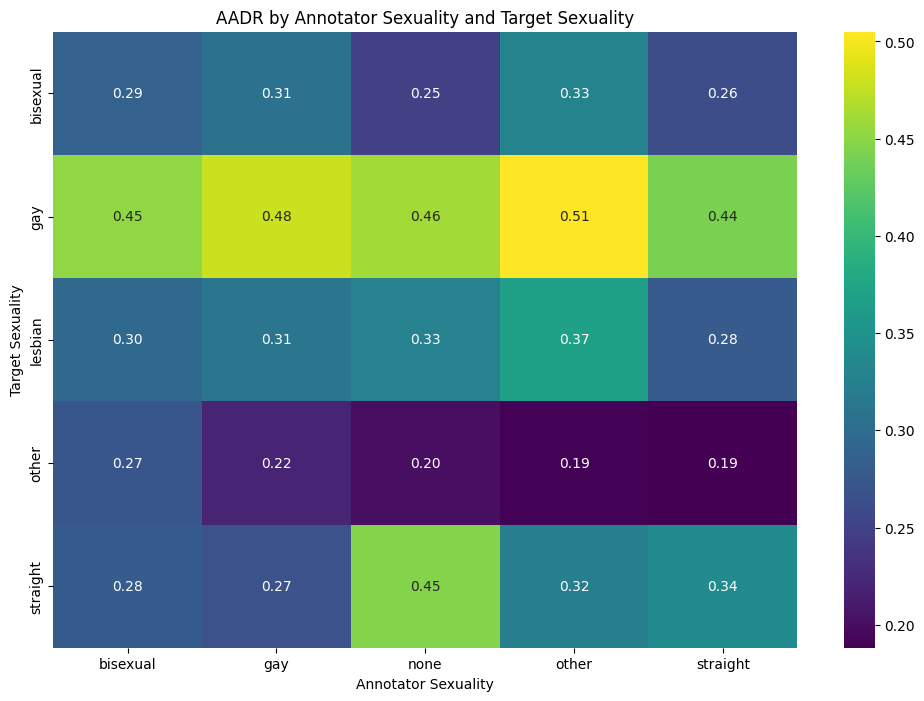

In [41]:
# Plot the heatmap for AADR by annotator sexuality and target sexuality
plt.figure(figsize=(12, 8))
sns.heatmap(t_sexuality_a_sexuality_aadr_pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title('AADR by Annotator Sexuality and Target Sexuality')
plt.xlabel('Annotator Sexuality')
plt.ylabel('Target Sexuality')
plt.show()

### Target vs Annotator Ideology

In [42]:
# Calculate AADR for Target Race within each annotator ideology
t_race_a_ideology_aadr_results = calculate_aadr_for_group(df, t_race_columns, 'annotator_ideology')

# Calculate AADR for Target Religion within each annotator ideology
t_religion_a_ideology_aadr_results = calculate_aadr_for_group(df, t_religion_columns, 'annotator_ideology')

# Calculate AADR for Target Gender within each annotator ideology
t_gender_a_ideology_aadr_results = calculate_aadr_for_group(df, t_gender_columns, 'annotator_ideology')

# Calculate AADR for Target Sexuality within each annotator ideology
t_sexuality_a_ideology_aadr_results = calculate_aadr_for_group(df, t_sexuality_columns, 'annotator_ideology')

In [43]:
# Unpack the tuple keys and their corresponding AADR value into a DataFrame
t_race_a_ideology_aadr_data = [{'Annotator Ideology': a_ideology, 'Target Race': t_race, 'AADR': aadr}
                  for (a_ideology, t_race), aadr in t_race_a_ideology_aadr_results.items()]
t_race_a_ideology_aadr_df = pd.DataFrame(t_race_a_ideology_aadr_data)

# Corrected pivot call
t_race_a_ideology_aadr_pivot = t_race_a_ideology_aadr_df.pivot(index='Target Race', columns='Annotator Ideology', values='AADR')

In [44]:
# Unpack the tuple keys and their corresponding AADR value into a DataFrame
t_religion_a_ideology_aadr_data = [{'Annotator Ideology': a_ideology, 'Target Religion': t_religion, 'AADR': aadr}
                  for (a_ideology, t_religion), aadr in t_religion_a_ideology_aadr_results.items()]
t_religion_a_ideology_aadr_df = pd.DataFrame(t_religion_a_ideology_aadr_data)

# Corrected pivot call
t_religion_a_ideology_aadr_pivot = t_religion_a_ideology_aadr_df.pivot(index='Target Religion', columns='Annotator Ideology', values='AADR')

In [45]:
# Unpack the tuple keys and their corresponding AADR value into a DataFrame
t_gender_a_ideology_aadr_data = [{'Annotator Ideology': a_ideology, 'Target Gender': t_gender, 'AADR': aadr}
                  for (a_ideology, t_gender), aadr in t_gender_a_ideology_aadr_results.items()]
t_gender_a_ideology_aadr_df = pd.DataFrame(t_gender_a_ideology_aadr_data)

# Corrected pivot call
t_gender_a_ideology_aadr_pivot = t_gender_a_ideology_aadr_df.pivot(index='Target Gender', columns='Annotator Ideology', values='AADR')

In [46]:
# Unpack the tuple keys and their corresponding AADR value into a DataFrame
t_sexuality_a_ideology_aadr_data = [{'Annotator Ideology': a_ideology, 'Target Sexuality': t_sexuality, 'AADR': aadr}
                  for (a_ideology, t_sexuality), aadr in t_sexuality_a_ideology_aadr_results.items()]
t_sexuality_a_ideology_aadr_df = pd.DataFrame(t_sexuality_a_ideology_aadr_data)

# Corrected pivot call
t_sexuality_a_ideology_aadr_pivot = t_sexuality_a_ideology_aadr_df.pivot(index='Target Sexuality', columns='Annotator Ideology', values='AADR')

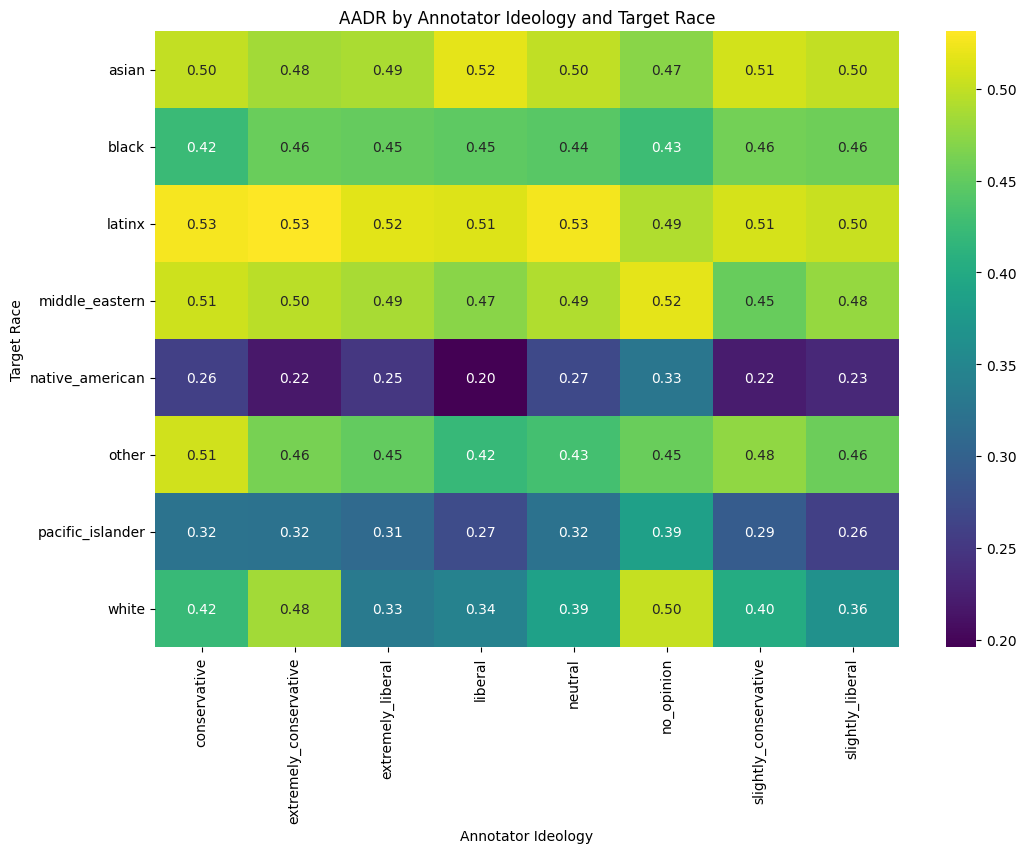

In [47]:
# Plot the heatmap for AADR by annotator ideology and target race
plt.figure(figsize=(12, 8))
sns.heatmap(t_race_a_ideology_aadr_pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title('AADR by Annotator Ideology and Target Race')
plt.xlabel('Annotator Ideology')
plt.ylabel('Target Race')
plt.show()

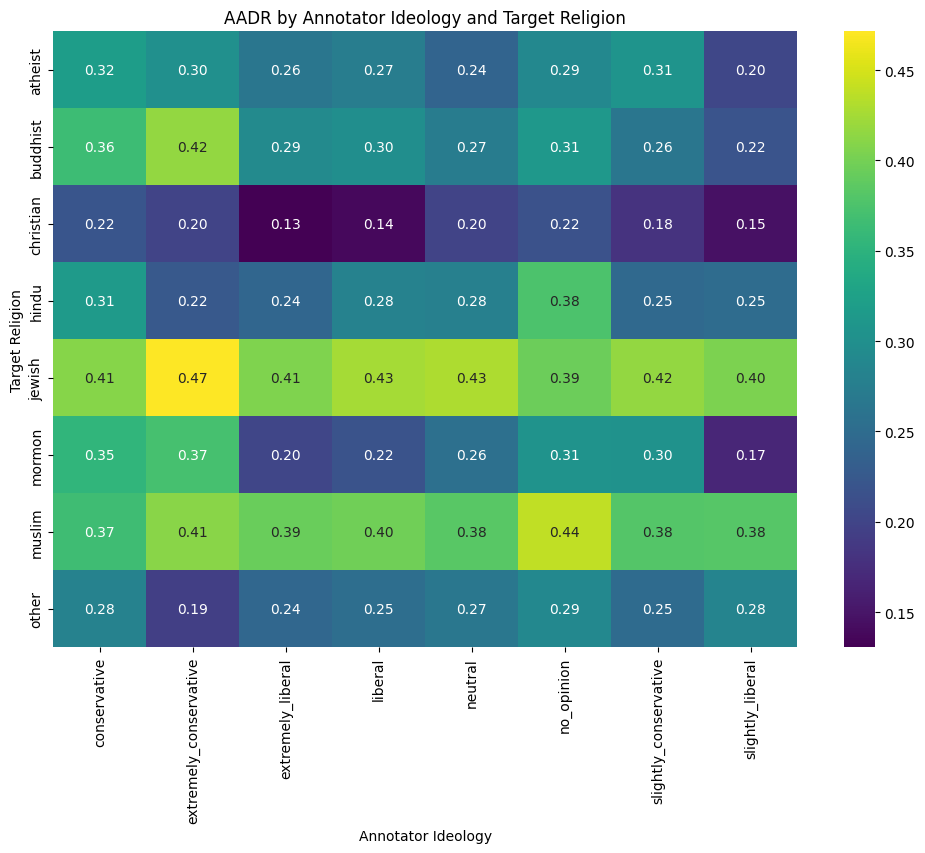

In [48]:
# Plot the heatmap for AADR by annotator ideology and target religion
plt.figure(figsize=(12, 8))
sns.heatmap(t_religion_a_ideology_aadr_pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title('AADR by Annotator Ideology and Target Religion')
plt.xlabel('Annotator Ideology')
plt.ylabel('Target Religion')
plt.show()

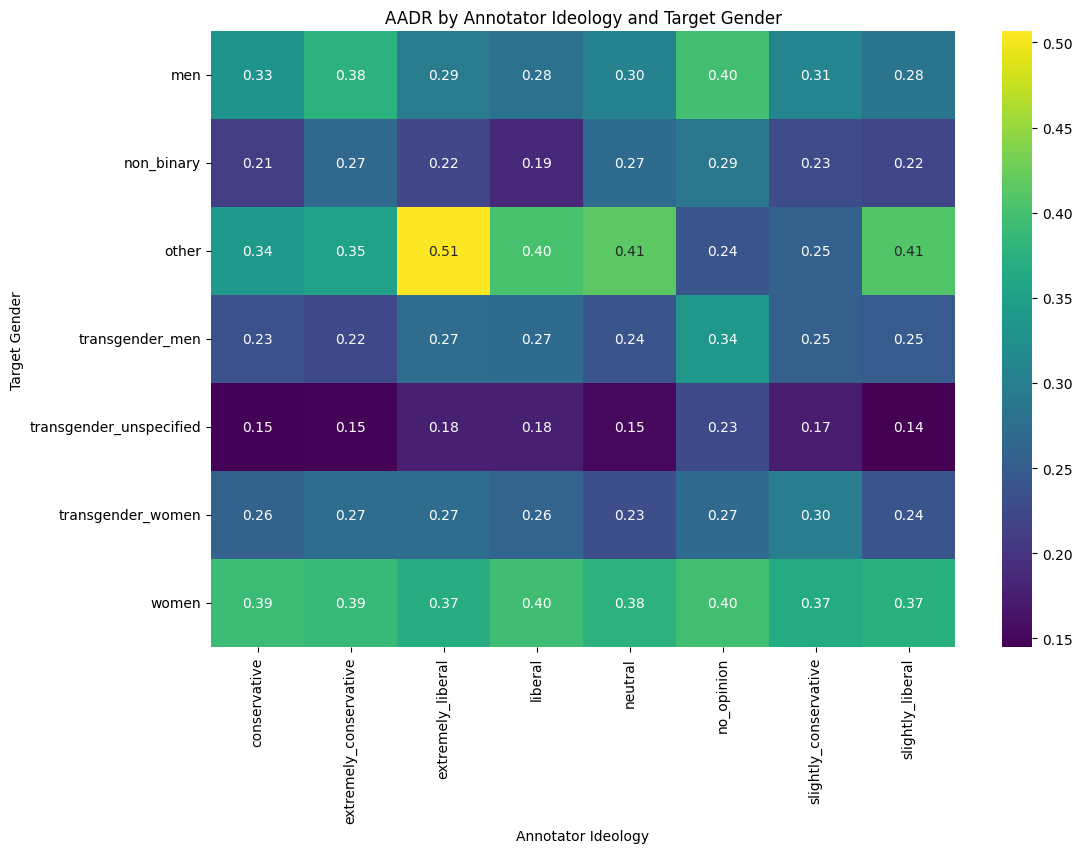

In [49]:
# Plot the heatmap for AADR by annotator ideology and target gender
plt.figure(figsize=(12, 8))
sns.heatmap(t_gender_a_ideology_aadr_pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title('AADR by Annotator Ideology and Target Gender')
plt.xlabel('Annotator Ideology')
plt.ylabel('Target Gender')
plt.show()

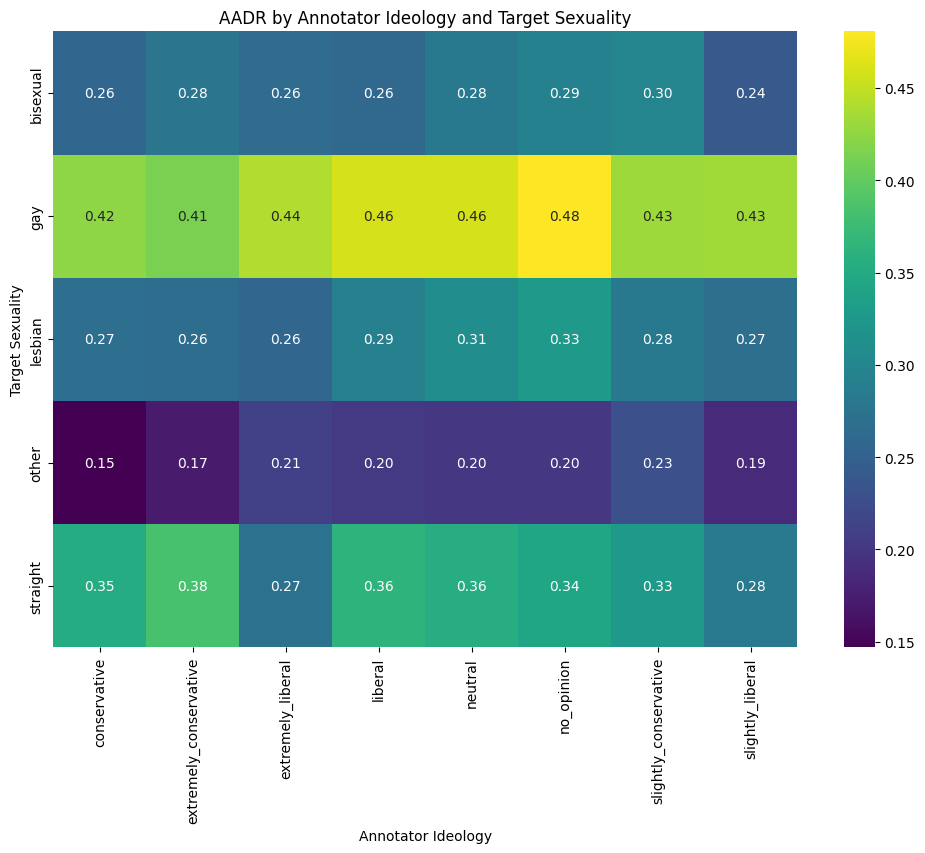

In [50]:
# Plot the heatmap for AADR by annotator ideology and target sexuality
plt.figure(figsize=(12, 8))
sns.heatmap(t_sexuality_a_ideology_aadr_pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title('AADR by Annotator Ideology and Target Sexuality')
plt.xlabel('Annotator Ideology')
plt.ylabel('Target Sexuality')
plt.show()